# Geodaten-Quellen und Formate

**Inhalt:** Suchen (und finden) von Geodaten verschiedenen Typs

**Nötige Skills**
- Geopandas Intro

**Lernziele**
- Besseres Verständnis für Shapefiles
- Geojson als alternatives Format
- Wissen, wie man zu Geodaten kommt

In [9]:
import pandas as pd
import geopandas as gpd

In [6]:
from IPython.display import Image

## 1. Shapefiles

Uns sind Geodaten bis jetzt vor allem in Shapefiles begegnet. Dieses Format wurde ursprünglich von der GIS-Firma ESRI entwickelt. Shapefiles kommen immer als Bündel von mehreren Dateien:

- `.shp`: dient zur Speicherung der Geometriedaten. Das wichtigste und grösste File
- `.dbf`: Enthält Sachdaten (auch Attributdaten genannt) im dBASE-Format
- `.shx`: dient als Index der Geometrie zur Verknüpfung der Sachdaten

Daneben kommen oft noch weitere Dateien im Bündel vor:

- `.prj`: Angabe zur Projektion der Daten
- `.cpg`: um den in der .dbf verwendeten Zeichensatz zu spezifizieren (zb Unicode)

Quelle: https://de.wikipedia.org/wiki/Shapefile

Shapefiles (`.shp`) sind unleserlich, wenn man sie in einem Texteditor öffnet.

Das zeigt sich am Beispiel des Schweizer Kantonsfiles, das wir bereits verwendet haben:

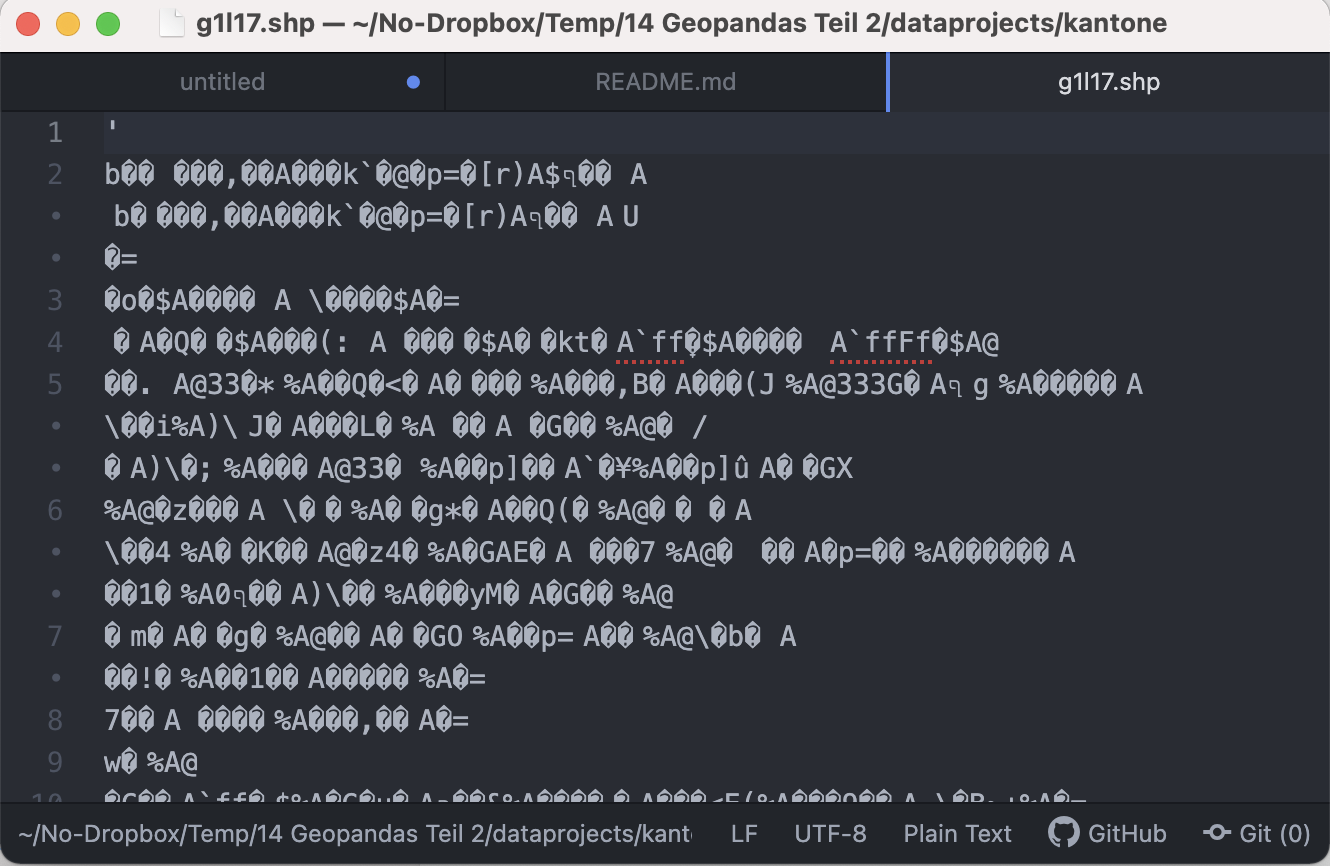

In [7]:
Image("dataprojects/kantone/shpfile.png")

Wenn man Geodaten als Shapefile runterlädt, erhält man meist ein Bündel als `.zip` oder in ähnlicher Form.

Wir können in Geopandas Shapefiles ganz einfach öffnen mit `read_file()`:

In [10]:
df = gpd.read_file("dataprojects/kantone/g1l17.shp")

In [11]:
df.head(2)

,CODE_ISO,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,CH,4129079,485411,833841,75270,295934,659600,201300,192,4631,1306,1079,2485411,2833841,1075270,1295934,2659600,1201300,"POLYGON ((684983.920 295673.986, 685166.411 29..."


<AxesSubplot:>

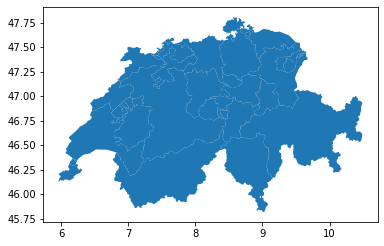

In [15]:
df.plot()

## 2. Geojson

Ein anderes Format, in dem Geodaten codiert sein können, ist GeoJSON.

Ähnlich wie bei Shapefiles werden dabei drei Grundtypen von Geometrien unterschieden:
- Punkte
- Linien
- Polygone

Anders als Shapefiles sind GeoJSON-Files effektiv nur *eine Datei*.

Und sie sind auch von Auge lesbar, da sie auf der JavaScript Object Notation basieren. Oder im Python-Jargon ausgedrückt: Die geometrischen Einheiten und ihre Attribute sind in einen Schachtelwust von Dictionaries und Listen gepackt.

Das sieht zB so aus:

`{ "type": "FeatureCollection",
  "features": [
    { "type": "Feature",
      "geometry": {"type": "Point", "coordinates": [102.0, 0.5]},
      "properties": {"prop0": "value0"}
    },
    { "type": "Feature",
      "geometry": {
        "type": "LineString",
        "coordinates": [
          [102.0, 0.0], [103.0, 1.0], [104.0, 0.0], [105.0, 1.0]
        ]
      },
      "properties": {
        "prop0": "value0",
        "prop1": 0.0
      }
    },
    { "type": "Feature",
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [ [100.0, 0.0], [101.0, 0.0], [101.0, 1.0],
            [100.0, 1.0], [100.0, 0.0] ]
        ]
      },
      "properties": {
        "prop0": "value0",
        "prop1": {"this": "that"}
      }
    }
  ]
}`

Quelle: https://de.wikipedia.org/wiki/GeoJSON

Auch Geojson-Dateien können wir mit Geopandas ganz leicht einlesen:

In [12]:
df = gpd.read_file("dataprojects/kantone/schweizer_kantone.geojson")

In [13]:
df.head(2)

,cartodb_id,kanton,area_ha,geometry
0,20,Jura,83851,"MULTIPOLYGON (((7.02493 47.50429, 7.03694 47.4..."
1,24,Neuenburg,80227,"MULTIPOLYGON (((6.87179 47.10286, 6.86686 47.0..."


<AxesSubplot:>

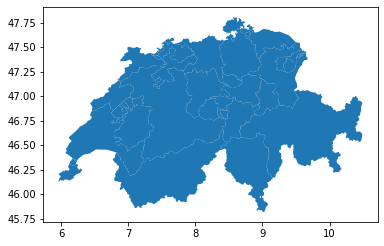

In [14]:
df.plot()

Zu den Feinunterschieden von Geojson und Shapefiles, siehe zB hier: https://feed.terramonitor.com/shapefile-vs-geopackage-vs-geojson/

Wichtig für uns zu wissen: Es gibt diverse Formate, in denen Geodaten codiert sein können – Geopackage wäre ein weiteres. Geopandas kann all diese Formate lesen. 

## 3. Datenquellen

Dieser Teil ist als Gruppenarbeit konzipiert. Wir suchen auf dem Web Geodaten zu Themen, die uns interessieren.

#### Aufgabe

1. Überlegen Sie sich, was ein interessantes Thema mit geografischem Bezug sein könnte (zum Beispiel: Flüsse in Sibirien, Öffentliche WCs in der Stadt Basel, das Busnetz im Kanton Thurgau, ...)


2. Suchen Sie online nach Daten zu diesem Thema:
- Gibt es diese Daten irgendwo überhaupt?
- In welchem Format sind sie codiert? Sind es tatsächlich Geodaten?
- Braucht es zusätzliche Geoinformationen, um mit den Daten zu arbeiten?

3. Wenn Sie etwas interessantes gefunden haben:
- Laden Sie die Daten in ein Notebook
- Schreiben Sie eine kurze Beschreibung zur Quelle
- Machen Sie einen einfachen Plot, der die Daten anzeigt

4. Packen Sie alles zusammen (Notbook, Shapefiles) in ein zip-File und teilen Sie es auf Slack.

Wir tragen die Resultate anschliessend zusammen und teilen sie in der Klasse!

### Beispiel: Flüsse auf der Welt

Natural Earth Data ist eine Webseite, die eine Reihe von Karten mit physischen und kulturellen Informationen zur Welt zum Download anbietet. Es gibt verschiedene Auflösungen: 1:10m, 1:50m, und 1:110.

http://www.naturalearthdata.com/downloads/

Die Daten sind als Shapefiles codiert und lassen sich für verschiedene Kategorien als zip-File herunterladen.

#### 1. Küstenlinien:

In [22]:
gdf_coasts = gpd.read_file("dataprojects/NaturalEarth/ne_50m_coastline/ne_50m_coastline.shp")

In [23]:
gdf_coasts.shape

(1428, 4)

In [24]:
gdf_coasts.head(2)

,scalerank,featurecla,min_zoom,geometry
0,0,Coastline,1.5,"LINESTRING (180.00000 -16.15293, 179.84814 -16..."
1,0,Coastline,4.0,"LINESTRING (177.25752 -17.05420, 177.28740 -17..."


<AxesSubplot:>

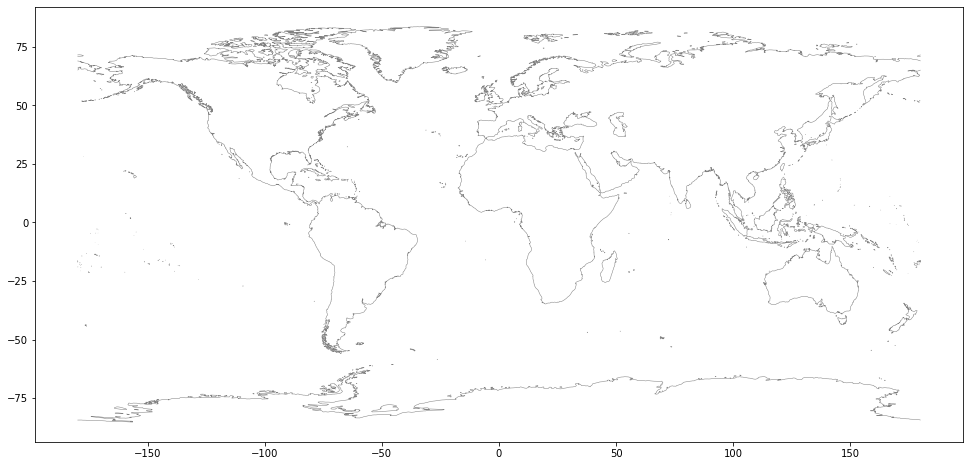

In [26]:
gdf_coasts.plot(figsize=(20,8), color="grey", linewidth=0.5)

#### 2. Flüsse

In [30]:
gdf_rivers = gpd.read_file("dataprojects/NaturalEarth/ne_50m_rivers_lake_centerlines/")

In [31]:
gdf_rivers.head(2)

,scalerank,featurecla,name,note,min_zoom,name_alt,min_label,name_en,label,wikidataid,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,6,Lake Centerline,Kama,None,5.0,None,6.0,Kama,Kama,Q79082,...,Kama,Rio Kama,Кама,Kama,None,Sông Kama,卡馬河,4,1159125905,"LINESTRING (51.93713 55.70107, 51.88087 55.686..."
1,6,River,Kama,None,5.0,None,6.0,Kama,Kama,Q79082,...,Kama,Rio Kama,Кама,Kama,None,Sông Kama,卡馬河,4,1159125917,"LINESTRING (53.69385 58.20632, 53.67715 58.273..."


<AxesSubplot:>

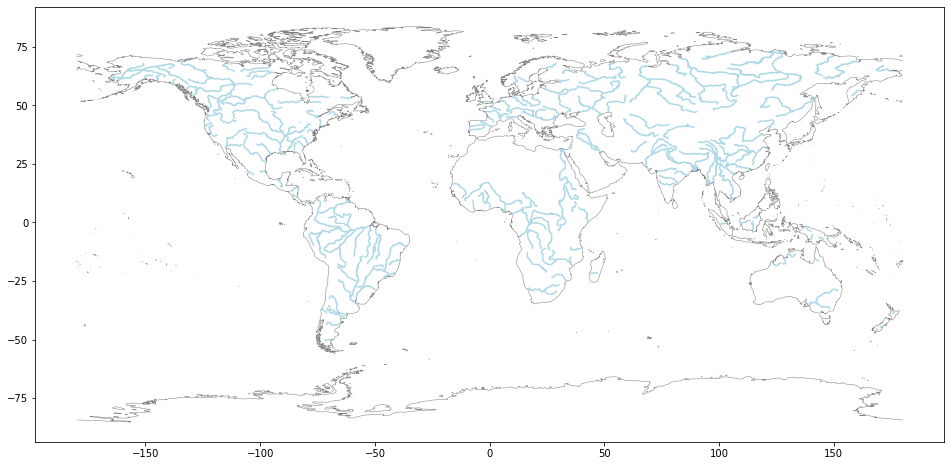

In [32]:
ax = gdf_coasts.plot(figsize=(20,8), color="grey", linewidth=0.5)
gdf_rivers.plot(color='lightblue', ax=ax)

### Beispiel: Strassennetz in Basel

Gefunden via opendata.swiss, ein Opendata-Portal:
- Fundus für diverse Geodaten auf unterschiedlichen Ebenen (National, Kantonal, Städte)
- Daten sind meistens etwas unstrukturiert, Suche notwendig
- Man wird oft weitergeleitet auf externe Seiten für den Download

Das Prozedere, um effektiv an die Daten zu kommen, ist allerdings etwas kompliziert.

#### 1. Weiterleitung zum Kanton Basel-Stadt

Hier gibt es eine Sammlung mit verschiedenen Statistiken, die der Kanton publiziert hat. Teils geocodiert.

https://opendata.swiss/de/group/geography/?organization=kanton-basel-stadt

#### 2. Weiterleitung zum Geo-Shop von Basel

Wir landen nun hier: https://shop.geo.bs.ch/

#### 3. Bestellung via Email

Anschliessend ist auf dem Geoshop eine erneute Datenauswal nötig. Die Datenlieferung erfolgt dann via E-Mail. Ein solches Vorgehen ist bei amtlichen Daten nicht untypisch, Stadt Zürich macht es zB auch so.

In [39]:
df_bs = gpd.read_file("dataprojects/opendata/MN_Mobilitaetsnetz_KGDM_V1_0/StrassentypenWege.shp")

In [40]:
df_bs.head(2)

,ID_STRWEG,STRNAME,SNH,GEMEINDE,KATEGORIE,WEG,geometry
0,600630,-,None,Basel,Wege,Waldweg,"LINESTRING (2612452.170 1269330.904, 2612451.8..."
1,600641,Schorenweg,ES,Basel,siedlungsorientierte Strasse,None,"LINESTRING (2613059.139 1269224.538, 2613062.2..."


<AxesSubplot:>

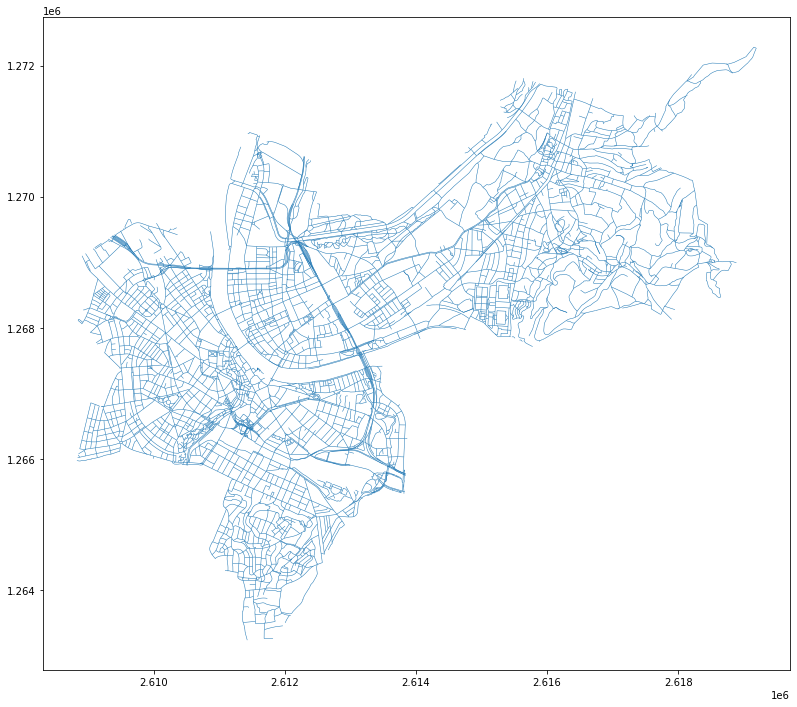

In [42]:
df_bs.plot(linewidth=0.5, figsize=(15,12))